In [1]:
# This notebook is used to plot our accelerometer data

import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot(xs, ys, title, axis_titles, save):
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    
    #ax.plot(xs, ys, marker = "o", markersize = 3, linestyle = "None", c = "#ff7f0f")
    ax.plot(xs, ys)
    
#    ax.set_ylim([0, 0.00025])
    plt.yscale("log")
    
    ax.set_ylim([2e-6, 1e-3])
    ax.set_xlim([0.5, 50])
    
    # Adds axis titles
    plt.ylabel(axis_titles[0])
    plt.xlabel(axis_titles[1])
    
    if save:
        plt.savefig(title + '.png', bbox_inches='tight')
    
    plt.show()
    

In [9]:
files = ["BuildingVibes4_1.txt", "BuildingVibesBalls4_2.txt.dat", "finalday-damped"]

#ads = {} # For now, we won't bother with acceleration data
fts = {}

for file in files:
    with open(file + ".fft", "r") as f:

        # Initialises files
        fts[file] = {"f": [], "x": [], "y": [], "z": []}
        
        for line in f:
            splits = [float(split) for split in line.split("\t")]
            
            fts[file]["f"].append(splits[0]) # Frequency        
            fts[file]["x"].append(splits[1]) # Amplitude in direction
            fts[file]["y"].append(splits[2])
            fts[file]["z"].append(splits[3])



	Data for file finalday-damped


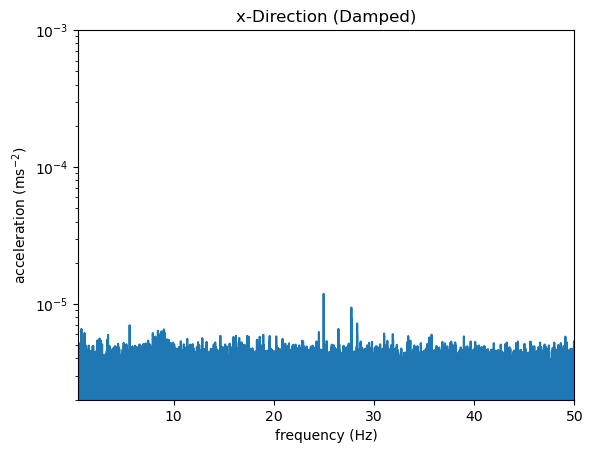

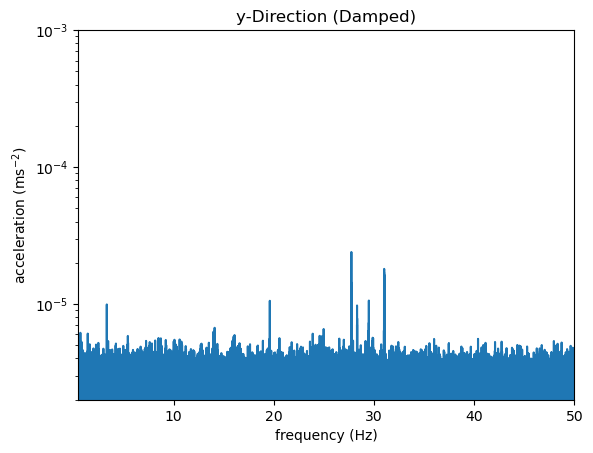

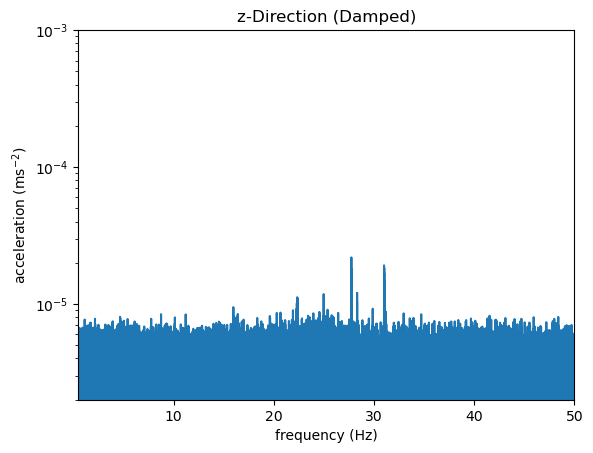

In [15]:
z = 0
for file in files:
    data = fts[file]
    save_con = z == 2
    
    if save_con:
        print("\n\tData for file", file)
        plot(data["f"], data["x"], "x-Direction (Damped)", ["acceleration (ms$^{-2}$)", "frequency (Hz)"], save = save_con)
        plot(data["f"], data["y"], "y-Direction (Damped)", ["acceleration (ms$^{-2}$)", "frequency (Hz)"], save = save_con)
        plot(data["f"], data["z"], "z-Direction (Damped)", ["acceleration (ms$^{-2}$)", "frequency (Hz)"], save = save_con)
    
    z += 1